In [1]:
import sys
sys.path.append('/Users/elenarodriguez/Documents/Escuela/4to/ML/Proyecto/bias-project-ML')
sys.path.append('/Users/elenarodriguez/Documents/Escuela/4to/ML/Proyecto/bias-project-ML/debiased_clip/subspace_debiasing')

In [2]:
import numpy as np
import pandas as pd

In [3]:
from metrics import *

In [4]:
from clip_subspace_debiasing import subspace_debiasing

In [5]:
MALE='male'
FEMALE= 'female'
GENDER_LABELS=[MALE, FEMALE]

In [6]:
#df = subspace_debiasing('/Users/elenarodriguez/Documents/Escuela/4to/ML/Proyecto/bias-project-ML/data/utkface/')
#df.to_json(r'result_subspace_debias.json')

In [7]:
df= pd.read_json(r'result_subspace_debias.json')

In [8]:
df.sample(5)

,filename,filepath,age,gender,race,predicted_gender
2499,53_0_0_20170117161104318.jpg.chip.jpg,/Users/elenarodriguez/Documents/Escuela/4to/ML...,53,male,white,male
1876,20_1_2_20170104015722028.jpg.chip.jpg,/Users/elenarodriguez/Documents/Escuela/4to/ML...,20,female,asian,female
1287,53_0_3_20170119201334485.jpg.chip.jpg,/Users/elenarodriguez/Documents/Escuela/4to/ML...,53,male,indian,male
2944,31_0_1_20170116143032562.jpg.chip.jpg,/Users/elenarodriguez/Documents/Escuela/4to/ML...,31,male,black,male
585,23_1_4_20170103225807185.jpg.chip.jpg,/Users/elenarodriguez/Documents/Escuela/4to/ML...,23,female,other,female


In [9]:
k=0
for i in range(len(df)):
    if(df['gender'][i]==df['predicted_gender'][i]): k+=1
k

3699

In [10]:
y_true=df['gender'].tolist()
y_pred=df['predicted_gender'].tolist()

In [11]:
male_total=df['gender'].value_counts()[MALE]
female_total= df['gender'].value_counts()[FEMALE]

#### Balanced Accuracy

In [12]:
macro_accuracy= macro_accuracy(y_true, y_pred)
macro_accuracy

0.7784766931704656

#### F1 score (macro)

F1 score can be interpreted as a measure of overall model performance from 0 to 1, where 1 is the best. To be more specific, F1 score can be interpreted as the model’s balanced ability to both capture positive cases (recall) and be accurate with the cases it does capture (precision).

the model’s ability to both capture positive cases and be accurate with the cases it does capture

In [13]:
macro_f1= macro_f1(y_true, y_pred, GENDER_LABELS)

#### Confusion Matrix

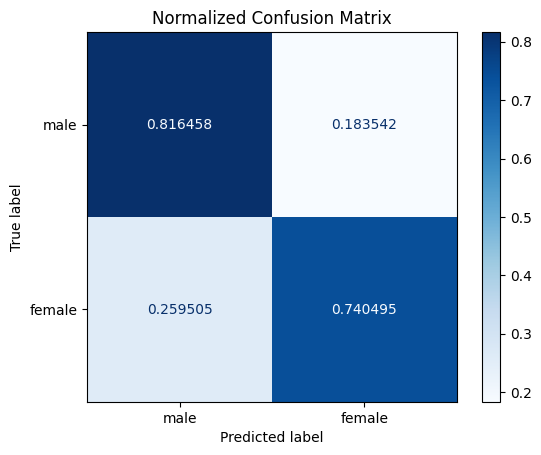

In [14]:
confusion_matrix= confusion_matrix(y_true, y_pred, GENDER_LABELS)

#### TPR

In [15]:
tpr(y_true, y_pred, GENDER_LABELS)

{'male': 0.8164582492940702, 'female': 0.7404951370468612}

#### FPR

In [16]:
fpr(y_true, y_pred, GENDER_LABELS)

{'male': 0.2595048629531389, 'female': 0.18354175070592982}

### `Fairness Metrics`

#### Equalized Odds

In [17]:
eq_odds= equalized_odds(y_true, y_pred, GENDER_LABELS)

EQUALIZED ODDS
Equalized odds


#### Disparate impact

In [18]:
disparate_impact= disparate_impact(y_true, y_pred, GENDER_LABELS)

DISPARATE IMPACT.
No disparate impact present
